## Assignment Part 1: Predict the price of a house
### Author: Revathy Remesh
#### Problem Statement :: 
The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

In [1]:
#import the required libraries
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization




from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score # evaluation metric


from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size



import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.shape

(414, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
#calculationg the total price of house 
df['Price']=df['House size (sqft)']*df['House price of unit area']

In [7]:
#droping unneccesary House price of unit area column
df.drop('House price of unit area',axis=1,inplace=True)

In [8]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,35597.804106
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,19890.892075
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,5440.400000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,20482.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,31224.200000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,48439.375000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,161327.500000


In [9]:
df.drop_duplicates(inplace=True)
df.shape


(414, 9)

In [10]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),Price
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.119059
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.198741
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.441094
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.381169
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.378440
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.346538
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.548679
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.702782
Price,0.119059,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,1.000000


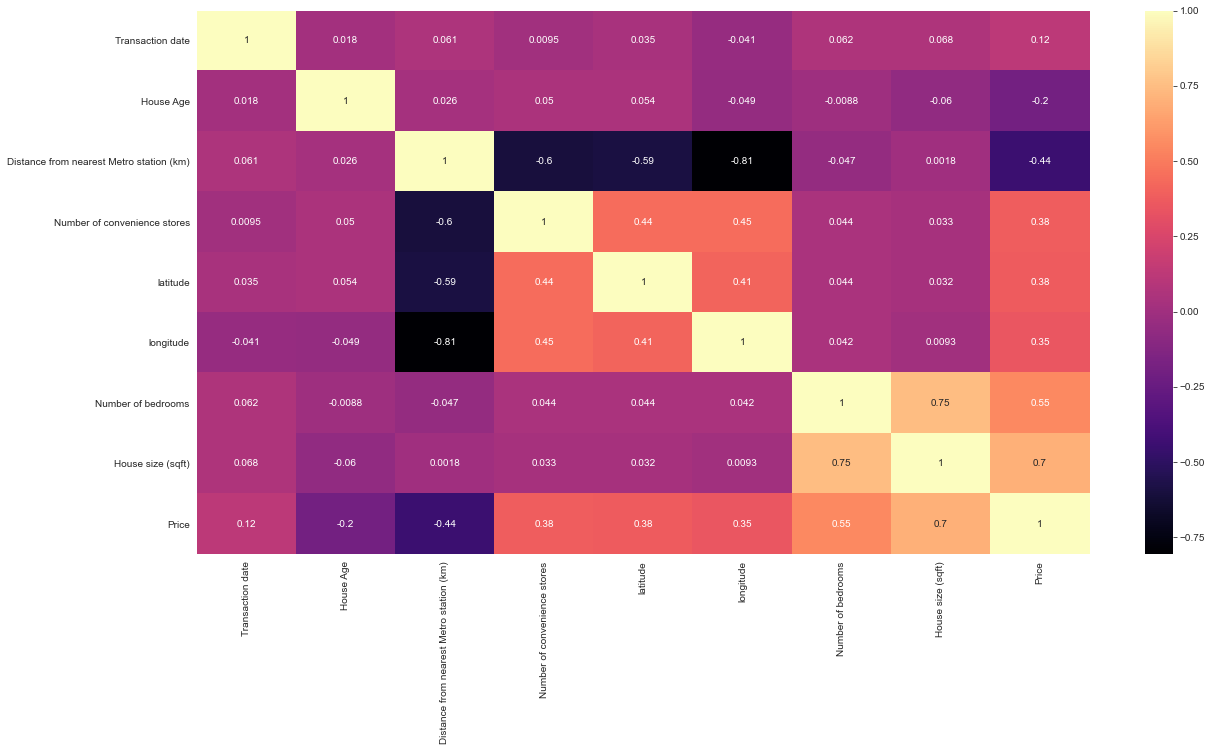

In [11]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')
plt.show()

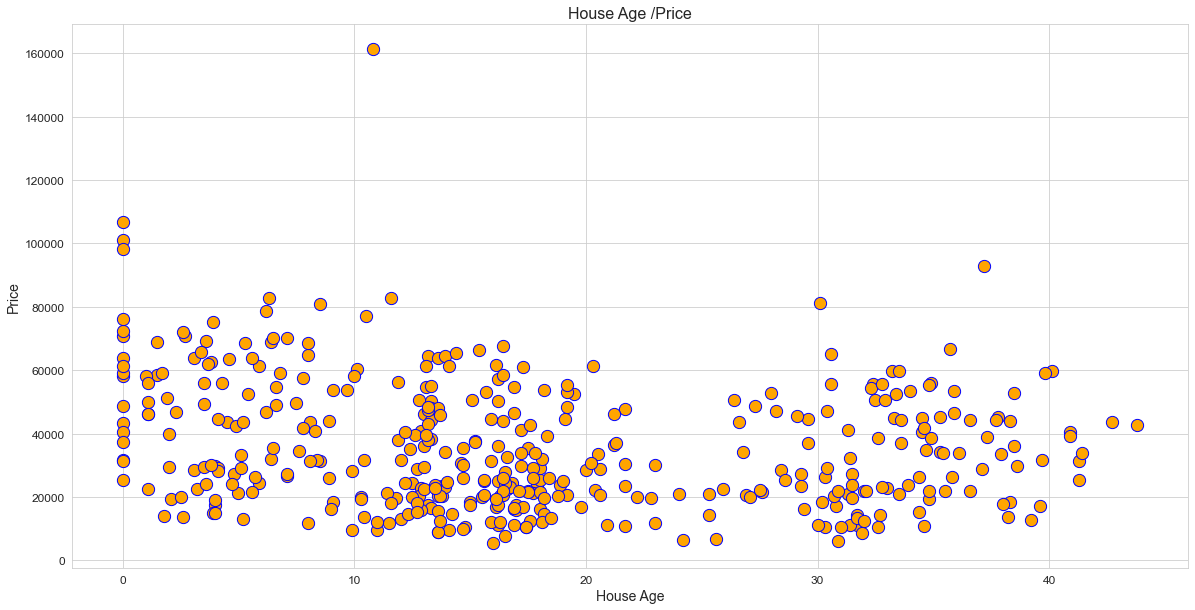

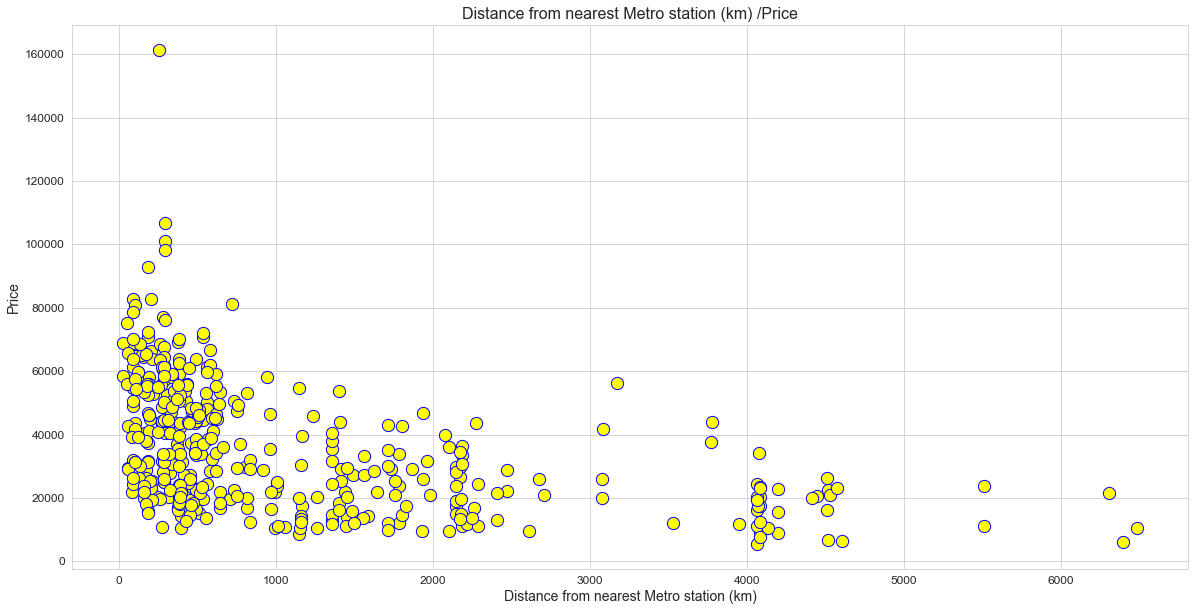

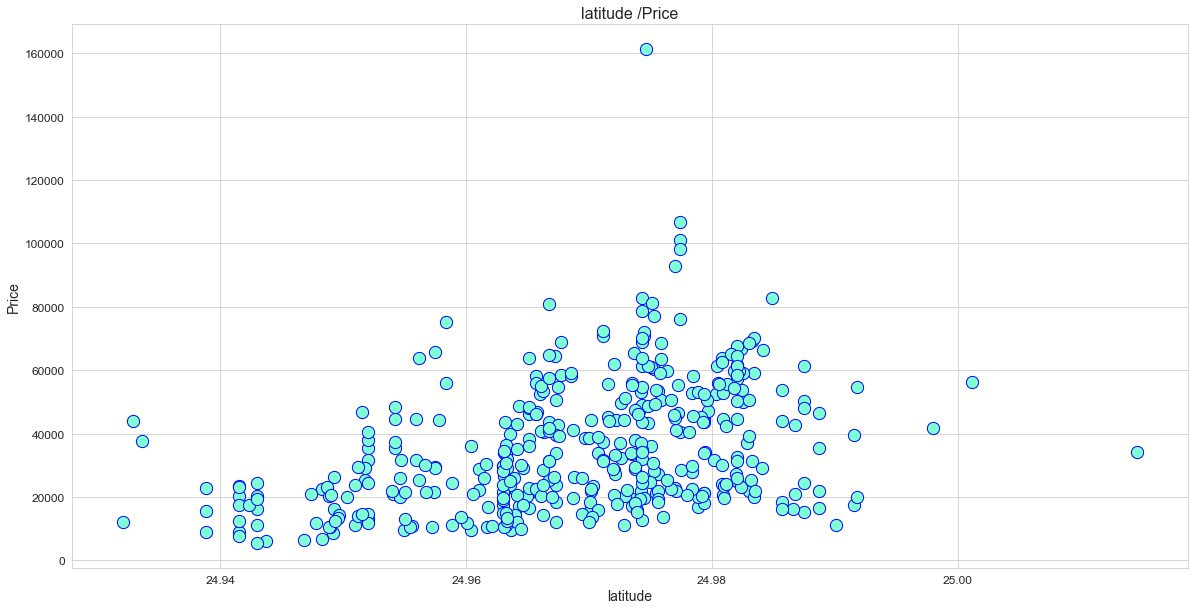

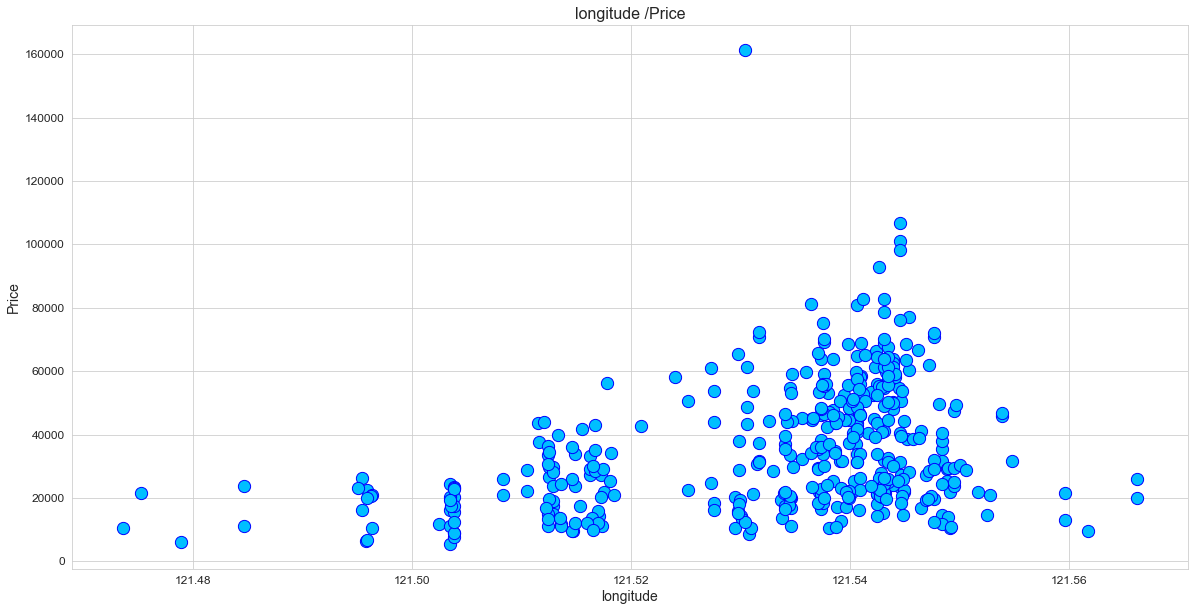

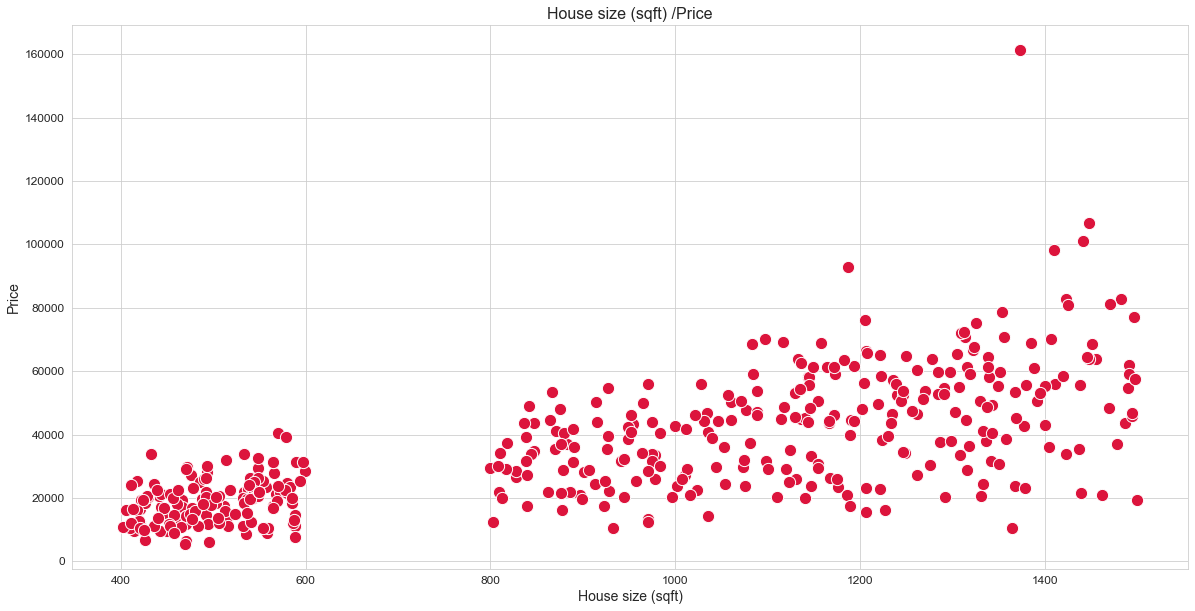

In [12]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[1], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.show()
    
    plot2 = sb.scatterplot(i[2], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
  
    plt.show()
    
    plot3 = sb.scatterplot(i[4], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} /Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.show()
    
    plot4 = sb.scatterplot(i[5], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} /Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
   
    plt.show()
    
    plot5 = sb.scatterplot(i[7], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.show()
    
   

    
scatter_df('Price')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of convenience stores', ylabel='Price'>

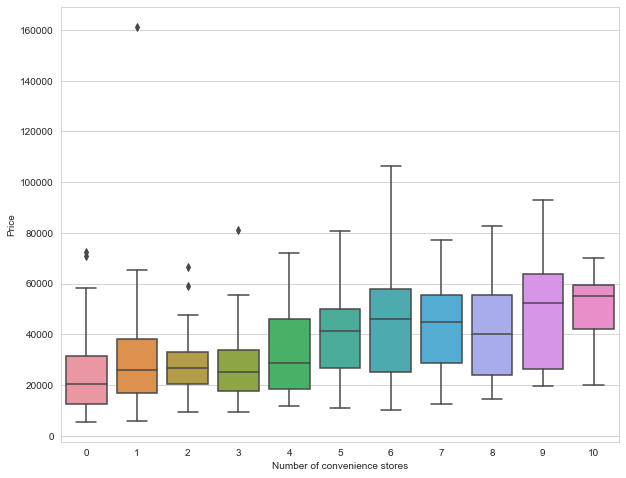

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Number of convenience stores',y='Price',data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Price'>

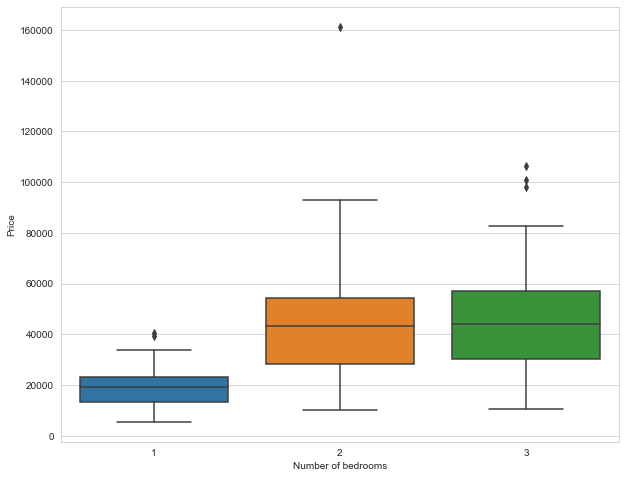

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Number of bedrooms',y='Price',data=df)

In [15]:
df['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [16]:
df['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [17]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'Price'],
      dtype='object')

In [18]:
df["location"] = list(zip(df["latitude"], df["longitude"]))
#drop lat and long column containing latitude and longitude
df.drop(columns = ['longitude','latitude'],inplace = True)
df['location'] = df['location'].astype("string")

In [19]:
#checking the multicolinearity between the variables 
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
vif(df[[i for i in df.describe().columns if i not in ['Price']]])

,variables,VIF
0,Transaction date,16.796691
1,House Age,3.474964
2,Distance from nearest Metro station (km),2.762167
3,Number of convenience stores,4.655056
4,Number of bedrooms,16.062568
5,House size (sqft),19.001828


In [21]:
df.drop(columns=['Transaction date'],inplace=True)

In [22]:
vif(df[[i for i in df.describe().columns if i not in ['Price']]])

,variables,VIF
0,House Age,3.027382
1,Distance from nearest Metro station (km),2.112750
2,Number of convenience stores,3.361868
3,Number of bedrooms,15.648281
4,House size (sqft),17.228124


In [23]:
df.drop(columns=['House size (sqft)'],axis=1,inplace=True)

In [24]:
vif(df[[i for i in df.describe().columns if i not in ['Price']]])

,variables,VIF
0,House Age,3.025437
1,Distance from nearest Metro station (km),1.958205
2,Number of convenience stores,3.132211
3,Number of bedrooms,4.217572


In [25]:
cat_features=['Number of convenience stores','Number of bedrooms']

In [26]:
df1 = pd.get_dummies(data = df,columns =cat_features)


In [27]:
df1.head()

,House Age,Distance from nearest Metro station (km),Price,location,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,21792.5,"(24.98298, 121.54024)",0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,19.5,306.59470,52328.0,"(24.98034, 121.53951)",0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,13.3,561.98450,50138.0,"(24.98746, 121.54391)",0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,13.3,561.98450,47950.0,"(24.98746, 121.54391)",0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5.0,390.56840,21162.1,"(24.97937, 121.54245)",0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Price                                     414 non-null    float64
 3   location                                  414 non-null    string 
 4   Number of convenience stores_0            414 non-null    uint8  
 5   Number of convenience stores_1            414 non-null    uint8  
 6   Number of convenience stores_2            414 non-null    uint8  
 7   Number of convenience stores_3            414 non-null    uint8  
 8   Number of convenience stores_4            414 non-null    uint8  
 9   Number of convenience stores_5            414 non-null    uint8  
 10  Number of convenience stores_6        

In [29]:
df1.drop('location',axis=1,inplace=True)

In [30]:
#seperating dependent and independent features

y = ['Price']
X =[x for x in df1.columns if x not in y]

In [31]:
X_var = df1[X].values
y_var = df1[y].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [32]:
#scalling of features

from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 square: 0.636985032738443
MAE:  8084.441477258066
MSE:  124253845.92189793


In [34]:
lasso = Lasso(alpha = 0.01) 
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 square: 0.6369851205648052
MAE:  8084.453079541568
MSE:  124253815.86042866


In [35]:
ridge = Ridge(alpha = 0.5) 
ridge.fit(X_train, y_train) 
y_pred = ridge.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2 square: 0.6372354482286143
MAE:  8083.430683069128
MSE:  124168132.96089542


In [36]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Suppport Vector Regression Accuracy:  0.5263546951700038


<IPython.core.display.Javascript object>

R2 square: 0.5263546951700038
MAE:  8798.963855421689
MSE:  162120727.89156625


In [37]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Suppport Vector Regression Accuracy:  0.6639702450936442


<IPython.core.display.Javascript object>

R2 square: 0.6639702450936442
MAE:  7257.400874657952
MSE:  115017266.93605961


In [38]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Suppport Vector Regression Accuracy:  -0.06065048051940369


<IPython.core.display.Javascript object>

R2 square: -0.06065048051940369
MAE:  15243.52474589599
MSE:  363042610.5502384


In [39]:
y_pred_train_rf=rf_regressor.predict(X_train)
print('R2 square:',metrics.r2_score(y_train,y_pred_train_rf))

<IPython.core.display.Javascript object>

R2 square: 0.9456941851856062


 After analysing result we can say that Random forest model  has accuracy of 94.56 % on train set and 66.3 % on test set.